Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ECO_L2T_LSTE_002_LST with Median Income_LST: Correlation = -0.01777787722432561, p-value = 0.7109330360323557 

ECO_L2T_LSTE_002_LST with Total Greeness: Correlation = -0.050761976472202534, p-value = 0.2896911516107493 

ECO_L2T_LSTE_002_LST with Impervious Surface (no building): Correlation = -0.058487001652537764, p-value = 0.2223939927527586 

Median Income_LST with ECO_L2T_LSTE_002_LST: Correlation = -0.01777787722432561, p-value = 0.7109330360323557 

Median Income_LST with Total Greeness: Correlation = 0.3937482404747515, p-value = 6.451200348467655e-18 Statistically significant

Median Income_LST with Impervious Surface (no building): Correlation = -0.14329101055917032, p-value = 0.002474440934546296 Statistically significant

Total Greeness with ECO_L2T_LSTE_002_LST: Correlation = -0.050761976472202534, p-value = 0.2896911516107493 

Total Greeness w

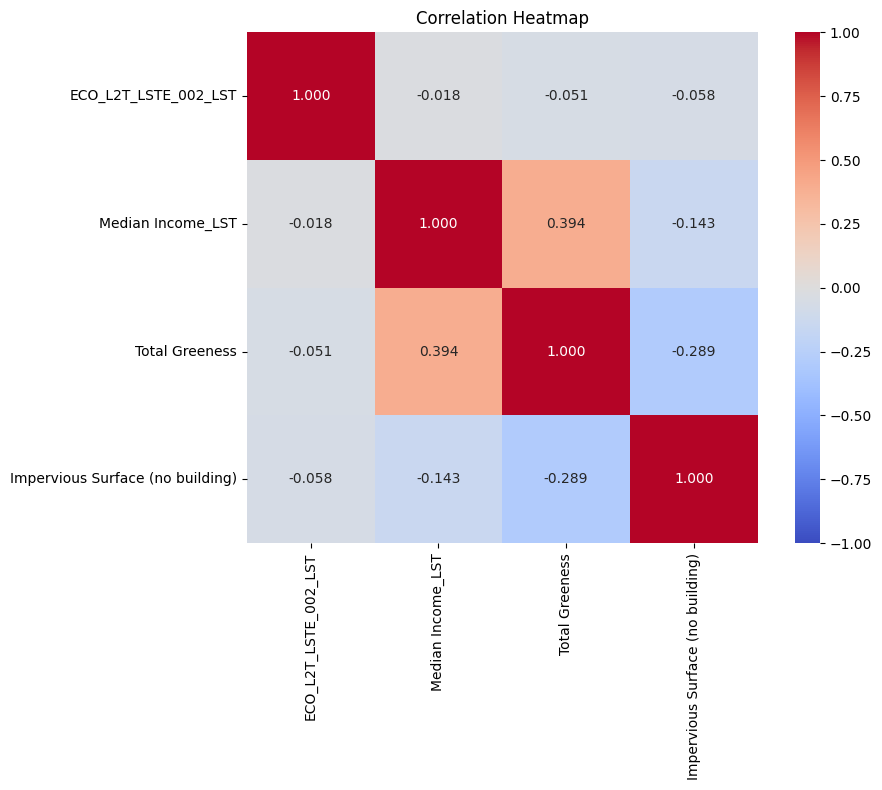

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/FINALUHIDATA.csv"
df = pd.read_csv(file_path)

# Sum total greenness
df['Total Greeness'] = df[['grass', 'cultivated vegetation', 'Trees_CanopyCover', 'bush/scrub']].sum(axis=1)

variables = ['ECO_L2T_LSTE_002_LST', 'Median Income_LST', 'Total Greeness', 'Impervious Surface (no building)']

scaler = StandardScaler()

# Normalize the columns
df[variables] = scaler.fit_transform(df[variables])


# Key factors

# Calculate correlations and p-values ignoring NaN values pairwise
# DON'T SWITCH BACK TO DROP ALL NaN ROWS BECAUSE THAT PREVENTS COMPARISON
# OF CERTAIN ROWS THAT STILL HAVE DATA THAT CAN BE COMPARED IN IT
results = {}
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            clean_data = df[[var1, var2]].dropna()
            corr, p_value = pearsonr(clean_data[var1], clean_data[var2])
            results[f"{var1} with {var2}"] = (corr, p_value)

# Printing all combinations
for key, (corr, p_value) in results.items():
    print(f"{key}: Correlation = {corr}, p-value = {p_value}", end=' ')
    if p_value < 0.05:
        print("Statistically significant", end='')
    print(end='\n\n')

# Heat map rows
heatmap_data = df[variables]

# Correlation matrix
correlation_matrix = heatmap_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', square=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/correlation_heatmap.png')
plt.show()
